<left><img width=25% src="img/cornell_tech2.svg"></left>

# Lecture 4: Classification and Logistic Regression

### Applied Machine Learning

__Volodymyr Kuleshov__<br>Cornell Tech

# Announcements

* Homework 1 is out on Gradescope
* Our Python and Numpy tutorial is this week

# Part 1: Classification

So far, every supervised learning algorithm that we've seen has been an instance of regression.

Next, let's look at some classification algorithms. First, we will define what classification is.

# Review: Components of a Supervised Machine Learning Problem

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \underbrace{\text{Dataset}}_\text{Features, Attributes, Targets} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

# Review: Regression vs. Classification

Consider a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We distinguish between two types of supervised learning problems depnding on the targets $y^{(i)}$. 

1. __Regression__: The target variable $y \in \mathcal{Y}$ is continuous:  $\mathcal{Y} \subseteq \mathbb{R}$.

2. __Classification__: The target variable $y$ is discrete and takes on one of $K$ possible values:  $\mathcal{Y} = \{y_1, y_2, \ldots y_K\}$. Each discrete value corresponds to a *class* that we want to predict.

# Binary Classification

An important special case of classification is when the number of classes $K=2$.

In this case, we have an instance of a *binary classification* problem.

# Classification Dataset: Iris Flowers

To demonstrate classification algorithms, we are going to use the Iris flower dataset. 

It's a classical dataset originally published by [R. A. Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in 1936. Nowadays, it's widely used for demonstrating machine learning algorithms.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

# Load the Iris dataset
iris = datasets.load_iris(as_frame=True)

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
# print part of the dataset
iris_X, iris_y = iris.data, iris.target
pd.concat([iris_X, iris_y], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Here is a visualization of this dataset in 3D. Note that we are using the first 3 features (out of 4) in this dateset.

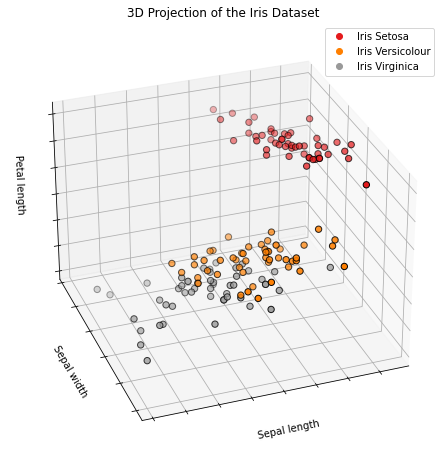

In [3]:
# Code from: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# let's visualize this dataset

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
# X_reduced = PCA(n_components=3).fit_transform(iris_X)
X_reduced = iris_X.to_numpy()[:,:3]
ax.set_title("3D Projection of the Iris Dataset")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Petal length")
ax.w_zaxis.set_ticklabels([])
p1 = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=iris_y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])

# Understanding Classification

How is clasification different from regression?
* In regression, we try to fit a curve through the set of targets $y^{(i)}$.

* In classification, classes define a partition of the feature space, and our goal is to find the boundaries that separate these regions.

* Outputs of classification models have a simple probabilistic interpretation: they are probabilities that a data point belongs to a given class.

Let's visualize our Iris dataset to see this. Note that we are using the first 2 features in this dateset.

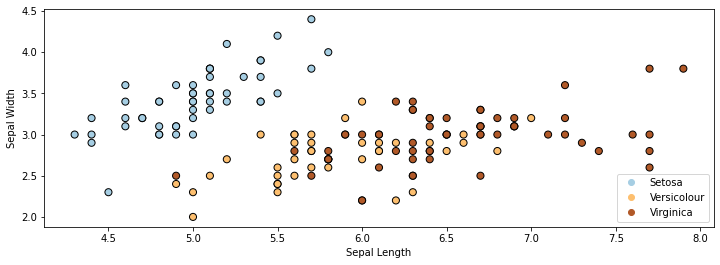

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# Plot also the training points
p1 = plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y,
            edgecolor='k', s=50, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'], loc='lower right')

Let's train a classification algorithm on this data.

Below, we see the regions predicted to be associated with the blue and non-blue classes and the line between them in the decision boundary.

In [8]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)

# Create an instance of Logistic Regression Classifier and fit the data.
X = iris_X.to_numpy()[:,:2]
# rename class two to class one
Y = iris_y.copy()
logreg.fit(X, Y) 

LogisticRegression(C=100000.0)

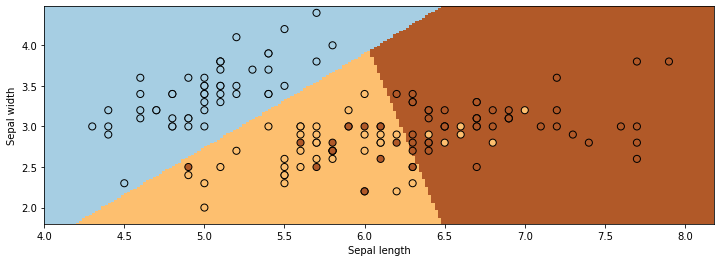

In [9]:
xx, yy = np.meshgrid(np.arange(4, 8.2, .02), np.arange(1.8, 4.5, .02))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired, s=50)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

<left><img width=25% src="img/cornell_tech2.svg"></left>


# Part 2: Logistic Regression

Next, we are going to see our first classification algorithm.

# Review: Classification

Consider a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We distinguish between two types of supervised learning problems depnding on the targets $y^{(i)}$. 

1. __Regression__: The target variable $y \in \mathcal{Y}$ is continuous:  $\mathcal{Y} \subseteq \mathbb{R}$.
2. __Classification__: The target variable $y$ is discrete and takes on one of $K$ possible values:  $\mathcal{Y} = \{y_1, y_2, \ldots y_K\}$. Each discrete value corresponds to a *class* that we want to predict.

# Binary Classification and the Iris Dataset

We are going to start by looking at binary (two-class) classification. 

To keep things simple, we will use the Iris dataset. We will be predicting the difference between class 0 (Iris Setosa) and the other two classes.

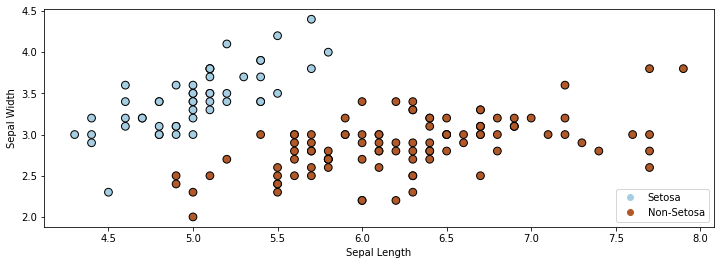

In [9]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

# rename class two to class one
iris_y2 = iris_y.copy()
iris_y2[iris_y2==2] = 1

# Plot also the training points
p1 = plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y2,
            edgecolor='k', s=60, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Non-Setosa'], loc='lower right')

# Review: Least Squares

Recall that the linear regression algorithm fits a linear model of the form
$$ f(x) = \sum_{j=0}^d \theta_j \cdot x_j = \theta^\top x. $$

It minimizes the mean squared error (MSE)
$$J(\theta)= \frac{1}{2n} \sum_{i=1}^n(y^{(i)}-\theta^\top x^{(i)})^2$$
on a dataset $\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We could also use the above model for classification problem for which $\mathcal{Y} = \{0, 1\}$.

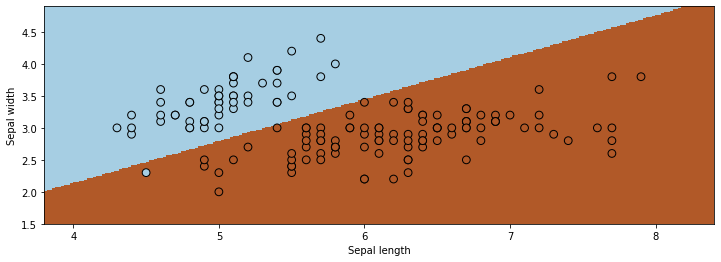

In [10]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html   
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
logreg = LinearRegression()

# Create an instance of Logistic Regression Classifier and fit the data.
X = iris_X.to_numpy()[:,:2]
Y = iris_y2
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z[Z>0.5] = 1
Z[Z<0.5] = 0

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired, s=60)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

Least squares returns an acceptable decision boundary on this dataset. However, it is problematic for a few reasons.
* There is nothing to prevent outputs larger than one or smaller than zero, which is conceptually wrong
* We also don't have optimal performance: at least one point is misclassified, and others are too close to the decision boundary.

# The Logistic Function

To address this problem, we will look at a different hypothesis class. We will choose models of the form:
$$ f(x) = \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}, $$
where
$$ \sigma(z) = \frac{1}{1 + \exp(-z)} $$
is known as the *sigmoid* or *logistic* function.

The logistic function $\sigma : \mathbb{R} \to [0,1]$ "squeezes" points from the real line into $[0,1]$.

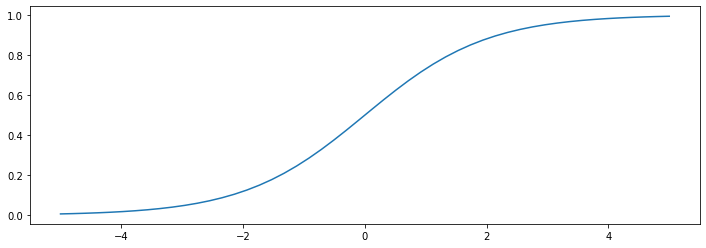

In [11]:
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.linspace(-5, 5)
plt.plot(z, sigmoid(z))

# The Logistic Function: Properties

The sigmoid function is defined as
$$ \sigma(z) = \frac{1}{1 + \exp(-z)}. $$
A few observations:

* The tends to 1 as $z \to \infty$ and tends to 0 as $z \to -\infty$.

* Thus, models of the form $\sigma(\theta^\top x)$ output values between 0 and 1, which is suitable for binary classification.

* It is easy to show that the derivative of $\sigma(z)$ has a simple form:
$\frac{d\sigma}{dz} = \sigma(z)(1-\sigma(z)).$

Let's implement our model using the sigmoid function.

In [12]:
def f(X, theta):
    """The sigmoid model we are trying to fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional data matrix
    
    Returns:
    y_pred (np.array): n-dimensional vector of predicted targets
    """
    return sigmoid(X.dot(theta))

# Probabilistic Classification

We can take this probabilistic perspective to derive a new algorithm for binary classification.

We will start by using our logistic model to parametrize a probability distribution as follows:
\begin{align*}
p(y=1 | x;\theta) & = \sigma(\theta^\top x) \\
p(y=0 | x;\theta) & = 1-\sigma(\theta^\top x).
\end{align*}
A probability over $y\in \{0,1\}$ of the form $P(y=1) = p$ is called Bernoulli.

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 3: Maximum Likelihood

Maximum likelihood learning is a general way of training machine learning models.

# The Data Distribution

We will assume that our datasets are samples from a probability distribution $\mathbb{P}$, which we will call the *data distribution*. We will denote this as
$$ x, y \sim P_\text{data}. $$

The training set $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$ consists of *independent and identicaly distributed* (IID) samples from $P_\text{data}$.

# Data Distribution: IID Sampling

The key assumption in that the training examples are *independent and identicaly distributed* (IID). 
* Each training example is from the same distribution.
* This distribution doesn't depend on previous training examples.

__Example__: Flipping a coin. Each flip has same probability of heads & tails and doesn't depend on previous flips.

__Counter-Example__: Yearly census data. The population in each year will be close to that of the previous year.

# Data Distribution: Example

Let's implement an example of a data distribution in numpy.

In [3]:
import numpy as np
np.random.seed(0)

def true_fn(X):
    return np.cos(1.5 * np.pi * X)

Let's visualize it.

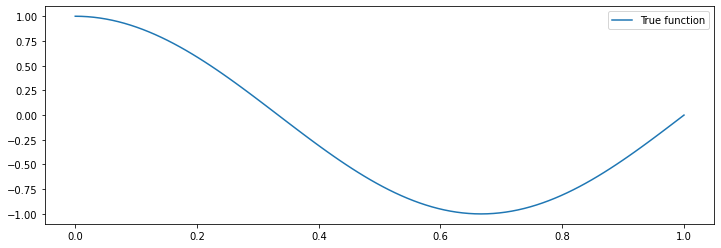

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, true_fn(X_test), label="True function")
plt.legend()

Let's now draw samples from a data distribution. We will generate random $x$, and then generate random $y$ using
$$ y = f(x) + \epsilon $$
for a random noise variable $\epsilon$.

In [5]:
n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fn(X) + np.random.randn(n_samples) * 0.1

We can visualize the samples.

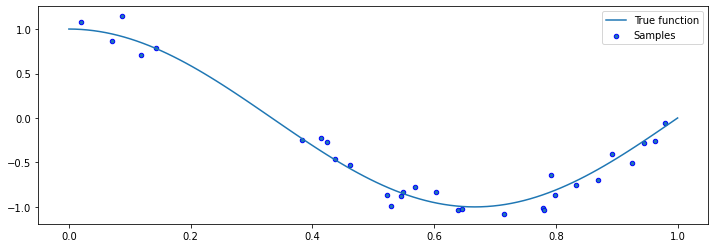

In [6]:
plt.plot(X_test, true_fn(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.legend()

# Data Distribution: Motivation

Why assume that the dataset is sampled from a distribution?

* There is inherent uncertainty in the data. The data may consist of noisy measurements (readings from an imperfect thermometer).

* There is uncertainty in the process we model. If $y$ is a stock price, there is randomness in the market that cannot be modeled.

* We can use probability and statistics to analyze supervised learning algorithms and prove that they work.

# Recall: Supervised Learning Models

We'll say that a model is a function
$$ f_\theta : \mathcal{X} \to \mathcal{Y} $$
that maps inputs $x \in \mathcal{X}$ to targets $y \in \mathcal{Y}$.

Models have *parameters* $\theta \in \Theta$ living in a set $\Theta$.

# Probabilistic Models

A probabilistic model is a probability distribution with parameters $\theta$

\begin{align*}
P_\theta(x,y) : \mathcal{X} \times \mathcal{Y} \to [0,1]. && P_\theta(y|x) : \mathcal{X} \times \mathcal{Y} \to [0,1].
\end{align*}

These models can be fit to approximate the data distribution $P_\text{data}(x,y)$.

For example, our logistic model parametrizes a probability distribution $P_\theta(y|x) : \mathcal{X} \times \mathcal{Y} \to [0,1]$ as follows:

\begin{align*}
p(y=1 | x;\theta) & = \sigma(\theta^\top x) \\
p(y=0 | x;\theta) & = 1-\sigma(\theta^\top x).
\end{align*}


# Learning Probabilistic Models

We now have a probabilistic model and a data distribution. 

It is natural to try to learn learn a good probability distribution $P_\theta(x,y)$ that approximates $P_\text{data}(x,y)$.

How do we do that?

# Maximum Log-Likelihood

The principle of *maximum likelihood* seeks to optimize the following objective:

$$
\arg\max_{P_\theta} \frac{1}{|\mathcal{D}|}\sum_{(\bf{x}, y)\in \mathcal{D}} \log P_\theta(\bf{x}, y),
$$
where $\mathcal{D}$ is a dataset sampled from $P_{\textrm{data}}$.

This asks that $P_\theta$ assign high probability to instances *in our dataset* $\mathcal{D}$.

# Example: Flipping a Random Coin

$
\newcommand{\cm}{\mathcal{M}}
$
Consider a simple example in which we repeatedly toss a biased coin and record the outcomes.

* There are two possible outcomes: heads ($H$) and tails ($T$). A training dataset consists of tosses of the biased coin, e.g., $\mathcal{D}=\{H,H,T,H,T\}$ 

* Assumption: true probability distribution is $P_{\textrm{data}}(x)$, $x \in \{H,T\}$ 

* Our task is to model the probability of heads/tails. Our class of models $\cm$ are Bernoulli distributions over $x \in\{H,T\}$.
<!-- * Example learning task: How should we choose $P_\theta(x)$ from $\cm$ if 60 out of 100 tosses are heads in $\cd$? -->

# Example: Flipping a Random Coin

How should we choose $P_\theta(x)$ if 3 out of 5 tosses are heads? Let's apply maximum likelihood learning.

* Our model is $P_\theta(x=H)=\theta$ and $P_\theta(x=T)=1-\theta$
* Our data is: $\mathcal{D}=\{H,H,T,H,T\}$ 
* The likelihood of the data is $\prod_{i} P_\theta(x_i)=\theta \cdot \theta \cdot (1-\theta) \cdot \theta \cdot (1-\theta)$.

We optimize for $\theta$ which makes $\mathcal{D}$ most likely. What is the solution in this case?

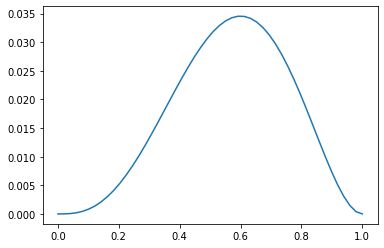

In [7]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# our dataset is {H, H, T, H, T}; if theta = P(x=H), we get:
coin_likelihood = lambda theta: theta*theta*(1-theta)*theta*(1-theta)

theta_vals = np.linspace(0,1)
plt.plot(theta_vals, coin_likelihood(theta_vals))

# Example: Flipping a Random Coin

Our log-likelihood function is
\begin{eqnarray}
\nonumber
L(\theta) &=& \theta^{\#\,\text{heads}} \cdot (1-\theta)^{\#\,\text{tails}}\\
\nonumber
\log L(\theta) &=& \log(\theta^{\#\,\text{heads}} \cdot (1-\theta)^{\#\,\text{tails}}) \\
\nonumber
&=& \#\,\text{heads} \cdot \log(\theta) + \#\,\text{tails} \cdot \log(1-\theta)
\end{eqnarray}
The MLE estimate is the $\theta^* \in [0,1]$ such that $\log L(\theta^*)$ is maximum.

Differentiating the log-likelihood function with respect to $\theta$ and setting the derivative to zero, we obtain
$$\theta^*= \frac{\#\,\text{heads}}{\#\,\text{heads}+\#\,\text{tails}}$$

When exact solutions are not available, we can optimize the log likelihood numerically, e.g. using gradient descent.

We will see examples of this later.

# Conditional Maximum Likelihood

Often, we are interested in only fitting a *conditional* model $P(y | x)$. For example, we may be only interested in predicting $y$ from $x$ rather than learning the joint structure of $x, y$.

In this setting, we can maximize the *conditional maximum likelihood*:

$$ \max_\theta \frac{1}{|\mathcal{D}|}\sum_{(\bf{x}, y)\in \mathcal{D}}  \log P_\theta(y|{\bf x}). $$

This asks that $P_\theta$ assign high probability to instances *in our dataset* $\mathcal{D}$.

It turns out this is equivalent to minimizing expected KL divergence with respect to the data distribution (homework problem!):
$$ \min_\theta \mathbb{E}_{x \sim \mathbb{P}_\text{data}} \left[ D(P_\text{data}(y|x) \mid\mid P_\theta(y|x)) \right]. $$

# Maximum Likelihood Estimation

The principle of *maximum likelihood* seeks to optimize the following objective:
$$\arg\max_{P_\theta} \mathbb{E}_{\bf x \sim P_{\textrm{data}}}{\log P_\theta({\bf x})} = \int_{x \in \mathcal{X}} P_{\textrm{data}}({\bf x}) \log P_\theta({\bf x}) d {\bf x}$$

This asks that $P_\theta$ assign high log-probability to instances that have high probability under $P_{\textrm{data}}$.

### Quick Digression: KL Divergences

Maximizing the likelihood also minimizes the *KL divergence*
$$
D(p \| q) = \sum_{{\bf x}} p({\bf x}) \log \frac{p({\bf x})}{q({\bf x})}.
$$
Since $D(p \| q) \geq 0$ for all $p,q$ with equality only if $p=q$, $D$ represents similarity between distirbutions, and is widely used in statistics.

See Homework 1 for more on this!

# Empirical Maximum Likelihood

In general we do not know $P_{\textrm{data}}$, hence we can't compute the expected value. We may however, approximate it with the *empirical log-likelihood*:
$$
\arg\max_{P_\theta} \mathbb{E}_{\bf{x} \sim P_{\textrm{data}}}{\log P_\theta({\bf x})} \approx
\arg\max_{P_\theta} \frac{1}{|\mathcal{D}|}\sum_{\bf{x}\in \mathcal{D}} \log P_\theta(\bf{x})
$$
where $\mathcal{D}$ is a dataset sampled from $P_{\textrm{data}}$.

This asks that $P_\theta$ assign high probability to instances *in our dataset* $\mathcal{D}$.

# Ordinary Least Squares as Maximum Likelihood

Recall that in ordinary least squared, we have a linear model of the form
$$f(x) = \theta^\top x.$$

At each training instance $(x,y)$, we seek to minimize the squared error
$$(y - \theta^\top x)^2.$$

Consider now the following Gaussian probabilistic model with mean $\mu_\theta(x) = \theta^\top x$ and variance $\sigma^2$:
$$ p(y | x; \theta) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{(y - \theta^\top x)^2}{2 \sigma^2} \right).$$

The log-likelihood of this model at a point $(x,y)$ equals
\begin{align*}
\log L(\theta) = \log p(y | x; \theta) = \text{const}_1 \cdot (y - \theta^\top x)^2 + \text{const}_2
\end{align*}
for some constants $\text{const}_1, \text{const}_2$.

Least squares thus amounts to fitting a Gaussian $\mathcal{N}(y; \mu(x), \sigma)$ with a standard deviation $\sigma$ of one and a mean of $\mu(x) = \theta^\top x$.

<left><img width=25% src="img/cornell_tech2.svg"></left>


# Part 4: Learning in Logistic Regression

We are now going to use maximum likelihood to learn the parameters of a logistic regression model.

# Logistic Regression

Our logistic model parametrizes a probability distribution $P_\theta(y|x) : \mathcal{X} \times \mathcal{Y} \to [0,1]$ as follows:
\begin{align*}
p(y=1 | x;\theta) & = \sigma(\theta^\top x) \\
p(y=0 | x;\theta) & = 1-\sigma(\theta^\top x).
\end{align*}

We can write this more compactly as
\begin{align*}
p(y | x;\theta) = \sigma(\theta^\top x)^y \cdot (1-\sigma(\theta^\top x))^{1-y}
\end{align*}

# Applying Maximum Lilkelihood

Following the principle of maximum likelihood, we want to optimize the following objective defined over a training dataset  $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.
\begin{align*}
L(\theta) & = \prod_{i=1}^n p(y^{(i)} \mid x^{(i)} ; \theta) \\
& = \prod_{i=1}^n \sigma(\theta^\top x^{(i)})^{y^{(i)}} \cdot (1-\sigma(\theta^\top x^{(i)}))^{1-y^{(i)}}.
\end{align*}

This log of this objective is also often called the log-loss, or cross-entropy.

Let's implement the likelihood objective.

In [13]:
def log_likelihood(theta, X, y):
    """The cost function, J(theta0, theta1) describing the goodness of fit.
    
    We added the 1e-6 term in order to avoid overflow (inf and -inf).
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    """
    return (y*np.log(f(X, theta) + 1e-6) + (1-y)*np.log(1-f(X, theta) + 1e-6)).mean()

# Review: Gradient Descent
If we want to optimize $J(\theta)$, we start with an initial guess $\theta_0$ for the parameters and repeat the following update:

$$ \theta_i := \theta_{i-1} - \alpha \cdot \nabla_\theta J(\theta_{i-1}). $$

# Gradient of the Log-Likelihood

We can show that the gradient of the log-likelihood equals:
\begin{align*}
\nabla_\theta J (\theta) = 
\left( y - f_\theta(x) \right) \cdot \bf{x}.
\end{align*}
* This expression looks very similar to the gradient of the mean squared error.
* However, it is different, because the model $f_\theta$ is different.

Let's implement the gradient.

In [14]:
def loglik_gradient(theta, X, y):
    """The cost function, J(theta0, theta1) describing the goodness of fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    
    Returns:
    grad (np.array): d-dimensional gradient of the MSE
    """
    return np.mean((y - f(X, theta)) * X.T, axis=1)

Let's now implement gradient descent.

In [15]:
threshold = 5e-5
step_size = 1e-1

theta, theta_prev = np.zeros((3,)), np.ones((3,))
opt_pts = [theta]
opt_grads = []
iter = 0
iris_X['one'] = 1
X_train = iris_X.iloc[:,[0,1,-1]].to_numpy()
y_train = iris_y2.to_numpy()

while np.linalg.norm(theta - theta_prev) > threshold:
    if iter % 50000 == 0:
        print('Iteration %d. Log-likelihood: %.6f' % (iter, log_likelihood(theta, X_train, y_train)))
    theta_prev = theta
    gradient = loglik_gradient(theta, X_train, y_train)
    theta = theta_prev + step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1

Iteration 0. Log-likelihood: -0.693145
Iteration 50000. Log-likelihood: -0.021506
Iteration 100000. Log-likelihood: -0.015329
Iteration 150000. Log-likelihood: -0.012062
Iteration 200000. Log-likelihood: -0.010076


Let's now visualize the result.

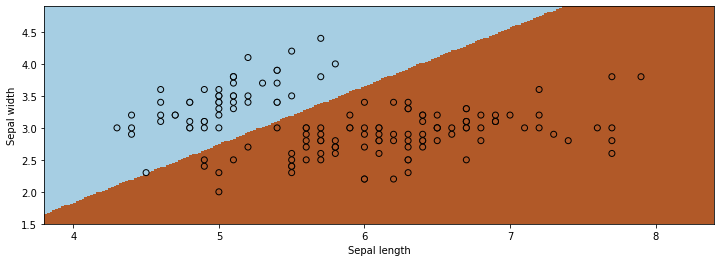

In [16]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = f(np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape)], theta)
Z[Z<0.5] = 0
Z[Z>=0.5] = 1

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

This is how we would use the algorithm via `sklearn`.

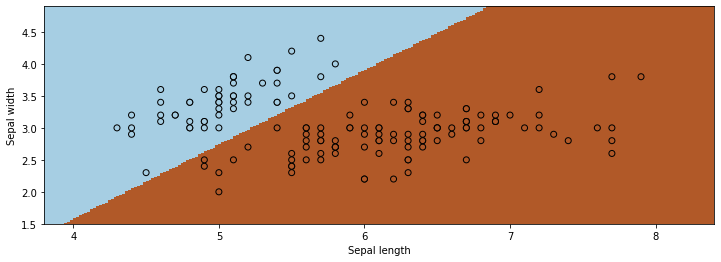

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, fit_intercept=True)

# Create an instance of Logistic Regression Classifier and fit the data.
X = iris_X.to_numpy()[:,:2]
Y = iris_y2
logreg.fit(X, Y)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, .02))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

# Observations About Logistic Regression

* Logistic regression finds a linear decision boundary, is the set of points for which $P(y=1|x)=P(y=0|x)$, or equivalently:
\begin{align*}
0 = \log\frac{P(y=1|x)}{P(y=0|x)}
= \log \frac{\frac{1}{1+\exp(-\theta^\top x)}}{1-\frac{1}{1+\exp(-\theta^\top x)}}
= \theta^\top x
\end{align*}
The claim holds because $0=\theta^\top x$ is a linear function.

* Unlike least squares, we don't have a closed form solution for $\theta$, but we can still apply gradient descent.

# Algorithm: Logistic Regression

* __Type__: Supervised learning (binary classification)
* __Model family__: Linear decision boundaries.
* __Objective function__: Cross-entropy, a special case of log-likelihood.
* __Optimizer__: Gradient descent.
* __Probabilistic interpretation__: Parametrized Bernoulli distribution.

<left><img width=25% src="img/cornell_tech2.svg"></left>


# Part 5: Multi-Class Classification

Finally, let's look at an extension of logistic regression to an arbitrary number of classes.

# Review: Logistic Regression

Logistic regression fits models of the form:
$$ f(x) = \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}, $$
where
$$ \sigma(z) = \frac{1}{1 + \exp(-z)} $$
is known as the *sigmoid* or *logistic* function.

# Multi-Class Classification

Linear regression only applies to binary classification problems. What if we have an arbitrary number of classes $K$?

* The simplest approach that can be used with any machine learning algorithm is the "one vs. all" approach. We train one classifer for each class to distinguish one class from all the others. 

* This works, but loses a valid probabilistic interpretation and is not very elegant.

* Alternatively, we may fit a probabilistic model that outputs multi-class probabilities.

Let's load a fully multiclass version of the Iris dataset.

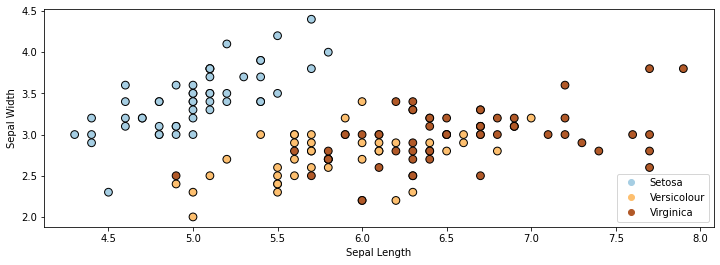

In [18]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# Plot also the training points
p1 = plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y,
            edgecolor='k', s=60, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'], loc='lower right')

# The Softmax Function

The logistic function $\sigma : \mathbb{R} \to [0,1]$ be seen as mapping input an input $\vec z\in\mathbb{R}$ to a probability.

Its multi-class extension $\vec \sigma : \mathbb{R}^K \to [0,1]^K$:  maps a $K$-dimensional input $z\in\mathbb{R}$ to a $K$-dimensional vector of probabilities.

Each componnent of $\vec \sigma(\vec z)$ is defined as
$$ \sigma(\vec z)_k = \frac{\exp(z_k)}{\sum_{l=1}^K \exp(z_l)}. $$
We call this the *softmax* function.

When $K=2$, this looks as follows:
$$ \sigma(\vec z)_1 = \frac{\exp(z_1)}{\exp(z_1) + \exp(z_2)}. $$

We can assume that $\exp(z_1) = 1$ because multiplying the numerator and denominator doesn't change any of the probabilities (so we can just divide by $\exp(z_1)$). Thus we obtain:
$$ \sigma(\vec z)_1 = \frac{1}{1 + \exp(z_2)}. $$

This is essentially our sigmoid function. Hence softmax generalizes the sigmoid function.

# The Softmax Model

We can use the softmax function to define a $K$-class classification model.

In the binary classification setting, we mapped weights $\theta$ and features $x$ into a probability as follows:
$$ \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}, $$

In the multi-class setting, we define a model $f : \mathcal{X} \to [0,1]^K$ that outputs the probability of class $k$ based on the features $x$ and class-specific weights $\theta_k$:
$$ \sigma(\theta_k^\top x)_k = \frac{\exp(\theta_k^\top x)}{\sum_{l=1}^K \exp(\theta_l^\top x)}. $$

Its parameter space lies in $\Theta^{K}$, where $\Theta = \mathbb{R}^d$ is the parameter space of logistic regression.


You may have noticed that this model is slightly over-parametrized: multiplying every $\theta_k$ by a constant results in an equivalent model. For this reason, it is often assumed that one of the class weights $\theta_l = 0$.

# Softmax Regression

We again take a probabilistic perspective to derive a $K$-class classification algorithm based on this model.

We will start by using our softmax model to parametrize a probability distribution as follows:
\begin{align*}
p(y=k | x;\theta) & = \vec \sigma(\theta^\top x)_k
\end{align*}

This is called a categorial distribution, and it generalizes the Bernoulli.

Following the principle of maximum likelihood, we want to optimize the following objective defined over a training dataset  $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.
\begin{align*}
L(\theta) & = \prod_{i=1}^n p(y^{(i)} \mid x^{(i)} ; \theta) = \prod_{i=1}^n \vec \sigma(\theta^\top x^{(i)})_{y^{(i)}}
\end{align*}

This model and objective function define *softmax regression*. (The term "regression" here is again a misnomer.)

Let's now apply softmax regression to the Iris dataset by using the implementation from `sklearn`.

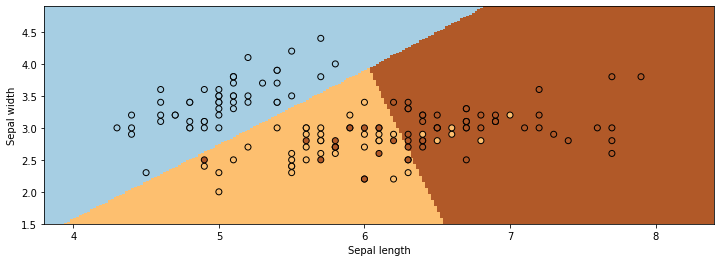

In [19]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, multi_class='multinomial')

# Create an instance of Softmax and fit the data.
logreg.fit(X, iris_y)
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=iris_y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

# Algorithm: Softmax Regression

* __Type__: Supervised learning (classification)
* __Model family__: Linear decision boundaries.
* __Objective function__: Softmax loss, a special case of log-likelihood.
* __Optimizer__: Gradient descent.
* __Probabilistic interpretation__: Parametrized categorical distribution.